1.线性回归

1）数据预处理

In [33]:
import pandas as pd  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.preprocessing import OneHotEncoder  
from sklearn.compose import ColumnTransformer  
from sklearn.pipeline import Pipeline  
from sklearn.impute import SimpleImputer  
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt  

In [34]:
# 加载数据，并将'单价'列变为数值类型
df = pd.read_csv(r'C:\Users\包海日\Desktop\汉阳区二手房.csv',dtype={'单价':float},thousands = ',')  

In [35]:
# 定义特征列和目标列
feature_cols = ['区域', '户型', '面积', '朝向', '装修', '楼层', '建筑结构']  
target_col = '单价'  
  
# 分离特征和目标  
X = df[feature_cols]  
y = df[target_col]  
  
# 对数值特征（'面积'）进行标准化
numeric_features = ['面积']  
numeric_transformer = Pipeline(steps=[  
    ('imputer', SimpleImputer(strategy='median')),  
    ('scaler', StandardScaler())  
])  
  
# 对分类特征进行独热编码  
categorical_features = ['区域', '户型', '朝向', '装修', '楼层', '建筑结构']  
categorical_transformer = Pipeline(steps=[  
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  
])  
  
# 合并数值和分类特征的转换器  
preprocessor = ColumnTransformer(  
    transformers=[  
        ('num', numeric_transformer, numeric_features),  
        ('cat', categorical_transformer, categorical_features)  
    ])  
  
# 创建一个包含预处理和线性回归的管道  
reg_pipeline = Pipeline(steps=[  
    ('preprocessor', preprocessor),  
    ('regressor', LinearRegression())  
])  
  
# 划分训练集和测试集  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  
  
# 训练模型  
reg_pipeline.fit(X_train, y_train)  
  
# 预测  
y_pred = reg_pipeline.predict(X_test)  
  
# 评估模型  
mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)  
  
print(f'Mean Squared Error: {mse}')  
print(f'R2 Score: {r2}') 

Mean Squared Error: 0.0002941787903280757
R2 Score: 0.9999999999652708


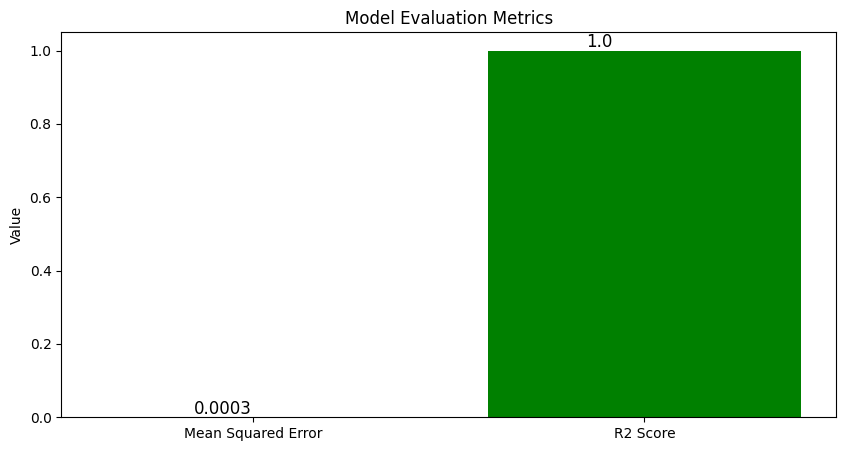

In [36]:
# 绘制 MSE和R2分数的条形图  
labels = ['Mean Squared Error', 'R2 Score']  
values = [mse, r2]  
  
fig, ax = plt.subplots(figsize=(10, 5))  
ax.bar(labels, values, color=['red', 'green'])  
  
for i, v in enumerate(values):  
    ax.text(i - 0.15, v + 0.01, str(round(v, 4)), color='black', fontsize=12)  
  
ax.set_ylabel('Value')  
ax.set_title('Model Evaluation Metrics')  
ax.set_xticks(range(len(labels)))  
ax.set_xticklabels(labels)  
  
plt.show()

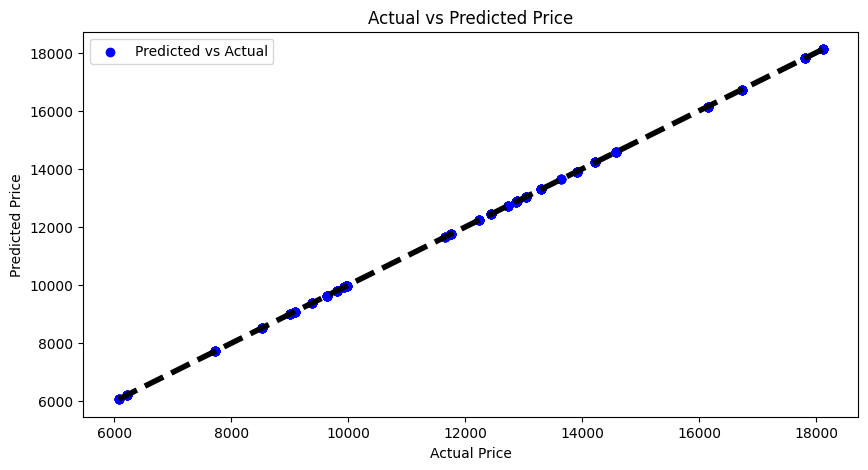

In [37]:
# 绘制预测值与实际值的散点图  
plt.figure(figsize=(10, 5))  
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')  
  
# 添加完美预测线（y=x）  
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  
  
plt.xlabel('Actual Price')  
plt.ylabel('Predicted Price')  
plt.title('Actual vs Predicted Price')  
plt.legend()  
  
plt.show()

2.梯度下降

In [38]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [44]:
# 前面已经做了定义特征列和目标列、分离特征和目标、对数值特征（'面积'）进行标准化、对分类特征进行独热编码等工作

# 使用 SGDRegressor构建管道  
reg_pipeline = Pipeline(steps=[  
    ('preprocessor', preprocessor),  
    ('regressor', SGDRegressor(max_iter=1000, tol=1e-3))  # 设置迭代次数和容忍度  
])   

# 已划分训练集和测试集

# 训练模型  
reg_pipeline.fit(X_train, y_train)  
  
# 预测  
y_pred = reg_pipeline.predict(X_test)  
  
# 评估模型  
mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)  
  
print(f'Mean Squared Error: {mse}')  
print(f'R2 Score: {r2}')  

Mean Squared Error: 12400.963654301157
R2 Score: 0.998536008540885


C:\anaconda\envs\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


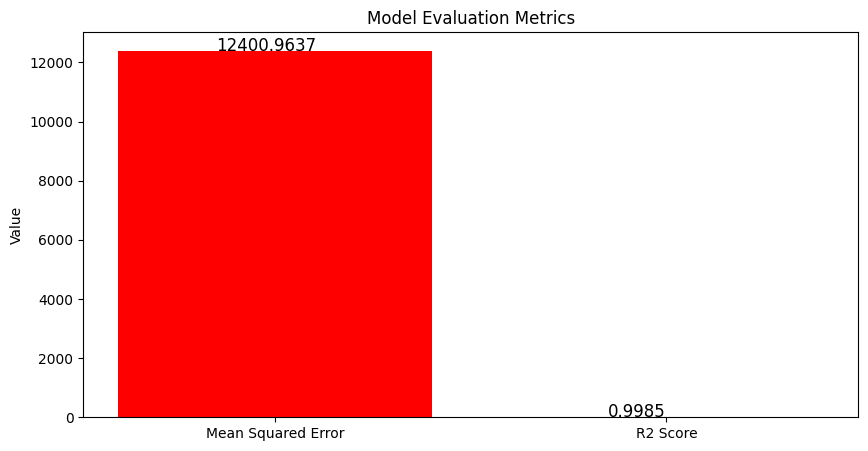

In [45]:
# 绘制 MSE和R2分数的条形图  
labels = ['Mean Squared Error', 'R2 Score']  
values = [mse, r2]  
  
fig, ax = plt.subplots(figsize=(10, 5))  
ax.bar(labels, values, color=['red', 'green'])  
  
for i, v in enumerate(values):  
    ax.text(i - 0.15, v + 0.01, str(round(v, 4)), color='black', fontsize=12)  
  
ax.set_ylabel('Value')  
ax.set_title('Model Evaluation Metrics')  
ax.set_xticks(range(len(labels)))  
ax.set_xticklabels(labels)  
  
plt.show()

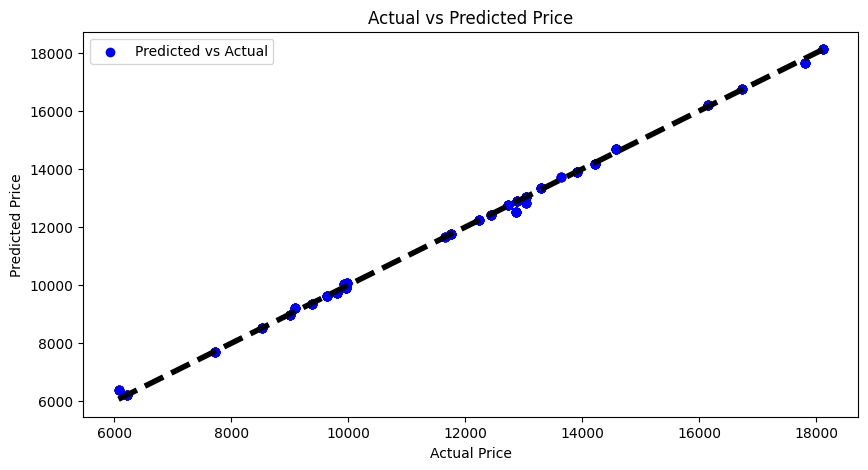

In [46]:
# 预测值与实际值的散点图  
plt.figure(figsize=(10, 5))  
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')  
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  
plt.xlabel('Actual Price')  
plt.ylabel('Predicted Price')  
plt.title('Actual vs Predicted Price')  
plt.legend()  
plt.show()